# Elementos de cálculo infinitesimal

In [ ]:
!pip install matplotlib --upgrade

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Este texto es la continuación de la primera parte de nuestros [Elementos de redes neuronales](https://dantenoguez.github.io/notebooks/alfa/redes.html). Mi propósito es obtener geométricamente la integral a partir de la derivada.

### La integral demostrada según el orden geométrico

Así como la derivada nace de la pendiente, podemos entender a la integral a partir del área. En particular, la integral nos ayuda a determinar el área bajo cualquier segmento de una función. 

Por ejemplo, digamos que tengo la siguiente función cuadrática y deseo obtener el área del segmento denotado por las líneas punteadas:

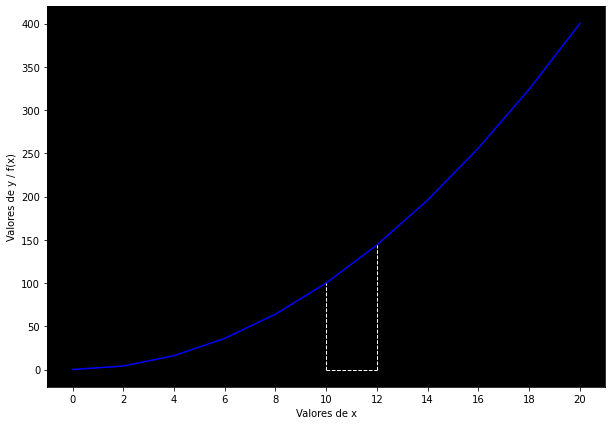

In [2]:
x = np.arange(0, 21, 2)
def f(x): return x**2
y = f(x)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, y, color='blue') 
plt.xticks(ticks=x)
ax.set_facecolor('black')
ax.set_xlabel('Valores de x')
ax.set_ylabel('Valores de y / f(x)')
ax.hlines(y=0, xmin=10, xmax=12, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=10, ymin=0, ymax=10**2, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=12, ymin=0, ymax=y[6], linewidth=1, color='white', linestyles='dashed')
plt.show()

Una posible aproximación podría obtenerse mediante las áreas del rectángulo y el triángulo que pueden formarse debajo:

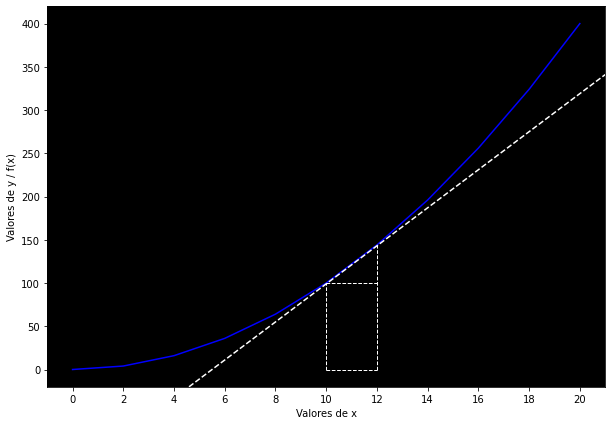

In [3]:
x = np.arange(0, 21, 2)
def f(x): return x**2
y = f(x)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, y, color='blue') 
plt.xticks(ticks=x)
ax.set_facecolor('black')
ax.set_xlabel('Valores de x')
ax.set_ylabel('Valores de y / f(x)')
ax.hlines(y=0, xmin=10, xmax=12, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=100, xmin=10, xmax=12, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=10, ymin=0, ymax=10**2, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=12, ymin=0, ymax=y[6], linewidth=1, color='white', linestyles='dashed')
ax.axline((11, 11**2), slope=2*11, color='white', linestyle='dashed') 
plt.show()

Donde:

$$
\text{Rectángulo} = base \times altura = x \cdot f(x) = (12 - 10)(100) = 200
$$

$$
\text{Triángulo} = \frac{1}{2} \times base \times altura = \frac{x \cdot f(x)}{2} = \frac{(12-10)(144-100)}{2} = 44
$$

$$
\text{Área total} = 200+44 = 244
$$

Pero también se nos podría ocurrir una aproximación más sencilla, aunque un poco menos exacta, a saber, determinar únicamente el área del rectángulo que ocupa esa área:

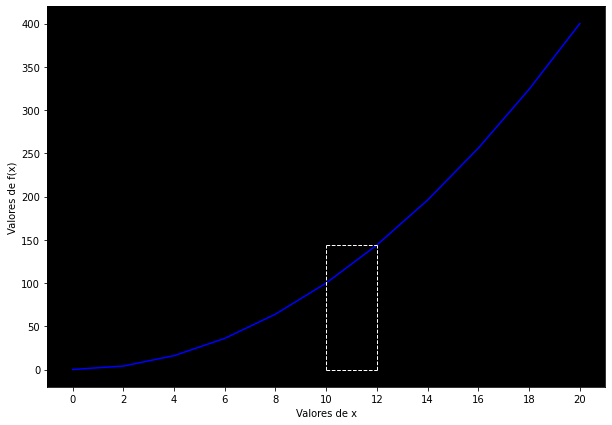

In [4]:
x = np.arange(0, 21, 2)
def f(x): return x**2
y = f(x)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, y, color='blue') 
plt.xticks(ticks=x)
ax.set_facecolor('black')
ax.set_xlabel('Valores de x')
ax.set_ylabel('Valores de f(x)')
ax.hlines(y=0, xmin=10, xmax=12, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=144, xmin=10, xmax=12, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=10, ymin=0, ymax=12**2, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=12, ymin=0, ymax=y[6], linewidth=1, color='white', linestyles='dashed')
plt.show()

Teniendo como resultado:

$$
\text{Rectángulo} = x \cdot f(x) = (12 - 10)(144) = 288
$$

Sin embargo, sabemos que estos cálculos son inexactos y trabajosos. También sabemos que las funciones pueden adquirir formas más complejas donde el procedimiento de dibujar figuras sería trabajoso e ineficiente. Al mismo tiempo, los «trucos» del cálculo diferencial pueden sugerirnos que debe existir una solución. ¿Qué tal si empezamos por aproximarnos al número correcto con rectángulos más pequeños?

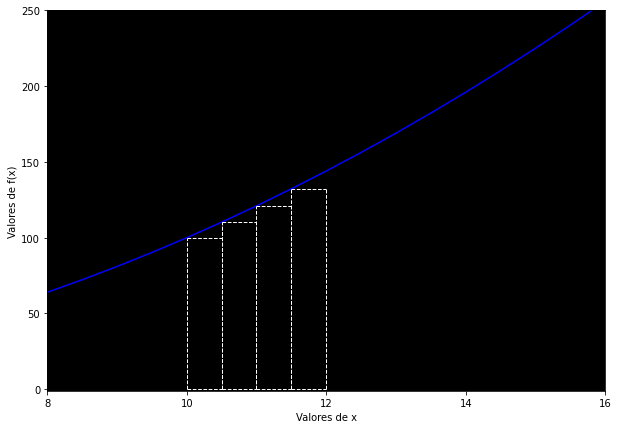

In [5]:
x = np.arange(0, 21, 0.5)
def f(x): return x**2
y = f(x)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, y, color='blue') 
plt.xticks(ticks=np.arange(0,21,2))
ax.set_ylim(-1, 250)
ax.set_xlim(8, 16)
ax.set_facecolor('black')
ax.set_xlabel('Valores de x')
ax.set_ylabel('Valores de f(x)')
ax.hlines(y=0, xmin=10, xmax=10.5, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=10**2, xmin=10, xmax=10.5, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=10, ymin=0, ymax=10**2, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=10.5, ymin=0, ymax=10.5**2, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=0, xmin=10.5, xmax=11, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=10.5**2, xmin=10.5, xmax=11, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=10.5, ymin=0, ymax=10.5**2, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=11, ymin=0, ymax=10.5**2, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=0, xmin=11, xmax=11.5, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=11**2, xmin=11, xmax=11.5, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=11, ymin=0, ymax=11**2, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=11.5, ymin=0, ymax=11**2, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=0, xmin=11.5, xmax=12, linewidth=1, color='white', linestyles='dashed')
ax.hlines(y=11.5**2, xmin=11.5, xmax=12, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=11.5, ymin=0, ymax=11.5**2, linewidth=1, color='white', linestyles='dashed')
ax.vlines(x=12, ymin=0, ymax=11.5**2, linewidth=1, color='white', linestyles='dashed')
plt.show()

Ahora tengo cuatro rectángulos con una base de $0.5$, cuyas áreas puedo determinar de la siguiente manera:

$$
\text{Rectángulo 1} = x_1 \cdot f(x_1) = (10.5 - 10)(100) = 50 \\
\text{Rectángulo 2} = x_2 \cdot f(x_2) = (11 - 10.5)(121) = 60.5 \\
\text{Rectángulo 3} = x_3 \cdot f(x_3) = (11.5 - 10.5)(132.25) = 66.12 \\
\text{Rectángulo 4} = x_4 \cdot f(x_4) = (12 - 11.5)(144) = 72 \\
$$

Finalmente, para obtener el área total, sumo entre sí todos los valores: $50+60.5+66.12+72 = 248.62$

Nos hemos aproximado mejor al resultado y nuestro número luce similar a nuestro primer cálculo. Ahora, para entrar de lleno en el cálculo infinitesimal, nos hace falta involucrarnos con el paradójico y enredoso mundo de lo infinito. ¿No sería más acertado un resultado si utilizáramos $10$ rectángulos en lugar de $4$? Es más, ¿por qué no usar mil, un millón o, mejor todavía, infinitos rectángulos para realizar nuestro cálculo? Esa es la esencia del cálculo integral y, ya familiarizados con la derivada, puede parecernos razonable e intuitivo.

Intentémoslo programáticamente, puesto que manualmente sería un desastre. Obtengamos $2100$ valores de $x$, desde $0$ hasta $20.999$ en intervalos de $0.01$:

In [6]:
x = np.arange(0, 21, 0.01)

f'Valores de x: {len(x)} | Muestra de 5 valores: {x[401:406]}'

'Valores de x: 2100 | Muestra de 5 valores: [4.01 4.02 4.03 4.04 4.05]'

De la misma forma, obtenemos sus valores correspondientes de $y$ con $f(x) = x^2$:

In [7]:
def f(x): return x**2
y = f(x)

f'Valores de y: {len(y)} | Muestra de 5 valores correspondientes a cada valor de x anterior: {y[401:406]}'

'Valores de y: 2100 | Muestra de 5 valores correspondientes a cada valor de x anterior: [16.0801 16.1604 16.2409 16.3216 16.4025]'

Ahora, para obtener el área dentro de las coordenadas $(x_1=10, y_1=100), (x_2=12, y_2=144)$, podemos obtener cientos de rectángulos con una base o distancia entre las $x$ de $0.01$. La altura de cada rectángulo será el valor de $y$ que corresponda a la $x$ en cuestión.

Para ello, tomamos los valores de $y$:

In [8]:
f'Número de valores de y (alturas): {len(y[1000:1200])} | Muestra de valores de y: {y[1001:1006]}'

'Número de valores de y (alturas): 200 | Muestra de valores de y: [100.2001 100.4004 100.6009 100.8016 101.0025]'

Y multiplicaremos cada una de estas alturas por una base $x$ de $0.01$ para obtener el área de cada mini rectángulo. Finalmente, sumaremos todas estas áreas individuales entre sí para obtener el área total. A esta operación se le denomina suma Riemanniana, y matemáticamente se expresa así:

$$
\lim_{\Delta x \to 0} \sum_{i=1}^{n} f(x_i)\Delta x
$$

donde $f(x_i)$ es el valor de la función en el iésimo punto, $\Delta x$ es el ancho del rectángulo y $n$ es el número de rectángulos. Programáticamente, se traduce así:

In [9]:
sum(y[1000:1200])*0.01

242.4467000000001

Gráficamente, nuestro recorrido ha sido más o menos así:

```{figure} ../../img/integral.gif
---
width: 70%
name: integral
---
Nuestro método consiste en minimizar «infinitamente» el ancho de cada rectángulo para obtener cientos de ellos. A medida que aumentamos los rectángulos, nuestro cálculo del área bajo la curva se vuelve más exacta; en el límite, nuestro cálculo es preciso. *Shout out* a Bernhard Riemann.
```

Nuestro experimento ha sido exitoso y hemos obtenido el mejor resultado hasta ahora. Antes de continuar, detengámonos un poco para aterrizar nuestras ideas, formalizarlas y corroborar que nuestro trabajo sea correcto.

Hasta el momento, hemos dicho que el área de cada uno de los rectángulos infinitamente delgados que hemos sugerido es igual a la altura (es decir, $f(x)$) multiplicada por la base, que en este caso sería una distancia o diferencia infinitamente pequeña entre las $x$, es decir, cercana a $0$, justo como con las derivadas; pero ahora, en lugar de utilizar $h$ para expresar esta idea, utilizaremos $dx$ porque expresa mejor la idea de una diferencia pequeña entre las $x$. 

En ese sentido, tenemos que cada área de nuestros rectángulos es $f(x) \cdot dx$. Finalmente, para integrar o sumar entre sí todas estas áreas pequeñas y obtener el área total, podemos utilizar una letra «s» alargada: $\int$. También indicaremos que esta suma se realizará con las áreas de todos los rectángulos desde $x_1$ hasta $x_n$ o, para no confundirnos con tantas $x$, desde $a$ hasta $b$, obteniendo la siguiente expresión:

$$
\int_{a}^{b}f(x) \cdot dx
$$

En realidad, para poder utilizar esta fórmula nos hace falta el teorema fundamental del cálculo. Este teorema, que es demasiado engorroso de entender, nos dice que la diferenciación (las derivadas) y la integración (las integrales) son operaciones inversas, como lo fueran la divisón y la multiplicación. Conformémonos con eso por ahora. Y, dicho eso, entendamos que podemos usar la «antiderivada»[^1] (la inversa de la derivada) para resolver una integral. Es decir, si la derivada y la integral son operaciones inversas, entonces simplemente invirtamos una derivada y eso debería darnos el resultado de la integral. Por ejemplo, si la derivada de $x^n$ con respecto a $x$ es ${nx}^{n-1}$, entonces la *antiderivada* o integral de $x^n$ con respecto a $x$ es $\frac{x^{n+1}}{n+1}+C$[^2]. Es decir, en lugar de restarle $1$ al exponente, le sumamos $1$; y en lugar de multiplicar por el exponente, dividimos entre el exponente. Luego agregamos la constante y voilà.

Ahora, para utilizar esta fórmula, solo reemplazamos los valores del intervalo [a, b] que nos interesa (en este caso, desde el punto 10 hasta el 12), reemplazamos $f(x)$ por el valor de la función y obtenemos la antiderivada (que denotaremos por $F$) de la función en $a$ y $b$, para finalmente restar las antiderivadas entre sí.


$$
\int_{a}^{b}f(x)dx = F(b) - F(a)
$$

$$
\int_{a}^{b}f(x)dx = \int_{10}^{12} x^2 dx
$$

$$
F(x^2) = \frac{x^{n+1}}{n+1}+C = \frac{x^{2+1}}{2+1}+C = \frac{x^3}{3}
$$

$$
\int_{a=10}^{b=12}(x^2)dx = \left(\frac{b^{n+1}}{n+1}+C\right) - \left(\frac{a^{n+1}}{n+1}+C\right) = \frac{12^3}{3} - \frac{10^3}{3} = 576-333.33 = 242.67
$$

### Reflexiones

Curiosamente, la palabra «cálculo» viene del latín [*calculus*,](https://www.perseus.tufts.edu/hopper/text?doc=Perseus:text:1999.04.0059:entry=calculus) cuyo significado es «pequeña piedra». Calcular, en las épocas antiguas, implicaba el uso de piedritas que se iban contando una tras otra, justo como cuando éramos pequeños hacíamos con el ábaco.

El cálculo lidia con cambios infinitamente pequeños —de ahí su nombre «cálculo infinitesimal». Inicialmente, estos «cambios pequeños» se concibieron como trucos prácticos que facilitaban cálculos como los que hemos hecho, pero nunca hubo una justificación matemáticamente rigurosa para proceder así, «imaginando» figuras infinitamente pequeñas. De ahí precisamente que Newton se hubiera negado a publicar su trabajo de cálculo y que Leibniz haya afirmado que lidiar con lo infinitamente pequeño era una simple ficción mental que facilitaba ciertos cálculos en la práctica. De ahí también que ideas como una «secante infinitamente pequeña que se confunde con un punto» suenen a paradoja.

Mi intención en estas lecciones ha sido sembrar un entendimiento elemental, intuitivo y conceptual del cálculo infinitesimal. A mi juicio, este tipo de entendimiento racional —fundamentado en las causas de las cosas—, además de ser el más importante, brilla por su ausencia en la penosa mayoría de escuelas, libros, lecciones y conferencias de matemáticas. 

Complementar estas lecciones con el estudio de ciertas reglas para derivar o integrar es bastante sencillo, mientras que proceder inversamente es increíblemente difícil. Intuir las razones detrás de cada detalle en una fórmula matemática abstracta —escrita con símbolos griegos, cursivas y letras arcaicas— es, a lo mucho, posible tras años de entrenamiento en las artes oscuras y profundidades de las matemáticas; sin embargo, al enseñar matemáticas, el sistema educativo y los matemáticos asumen que cualquier joven estudiante, sin motivación alguna para hacerlo, es perfectamente capaz de tal proeza. Considero esto un fracaso estrepitoso y mi trabajo ha sido un humilde intento de remediarlo de alguna forma.

### Referencias

Durante la redacción de mis textos sobre derivadas e integrales, además de los cursos de Khan Academy, fueron particularmente útiles los siguientes videos de YouTube:

- Las lecciones de Eddie Woo sobre cálculo [diferencial](https://youtu.be/tt2DGYOi3hc) e [integral](https://youtu.be/_hf3JowQfKM).
- *This Is the Calculus They Won't Teach You* de [A Well-Rested Dog](https://youtu.be/5M2RWtD4EzI).
- *Why is calculus so... EASY?* de [Mathologer](https://youtu.be/kuOxDh3egN0).
- *Understand Calculus in 35 Minutes* de [The Organic Chemistry Tutor](https://youtu.be/WsQQvHm4lSw).

Según recuerdo, la lección del [Traductor de Ingeniería](https://youtu.be/_6-zwdrqD3U) sobre derivadas tiene un buen enfoque, aunque tiende a hacer las cosas más complicadas de lo que son. De la misma forma, los videos de [3Blue1Brown](https://youtu.be/WUvTyaaNkzM), aunque buenos a ratos, siempre me confunden y me dejan huecos entre las ideas. En cualquier caso, ambos merecen mención.

Finalmente, aunque solo he hojeado unas páginas, me parece que *Calculus made easy* de [Thompson](https://calculusmadeeasy.org) es un buen libro.



[^1]: No es esta una expresión nuestra: realmente se le llama «antiderivada» en el mundo académico.
[^2]: $C$ es una constante, y es una formalidad matemática que debemos agregar a toda antiderivada. $C$ es «invisible» en la derivada porque la derivada de una constante es $0$. Esto debe tener sentido para nosotros después de haber estudiado las derivadas: si una función no cambia (es decir, es constante), entonces su derivada será $0$ porque la derivada mide la tasa de cambio de la función. Un valor constante, por definición, nunca cambia.